 #                                                                ** Car Analysis Project**


##                                                                    Introduction
This notebook provides an exploratory data analysis (EDA) of a car dataset. The dataset includes various attributes such as price, model year, model, condition, cylinders, fuel type, odometer reading, transmission type, vehicle type, paint color, whether the car is 4WD, date posted, and days listed. The goal of this analysis is to uncover insights and patterns that can help in understanding the factors affecting car prices and other related metrics.

In [51]:
# Import necssary libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
#Load the dataset
df = pd.read_csv("C:\\Users\\nsuka\\Desktop\\sample_project\\vehicles_us.csv")

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [54]:
# Display the first 10 rows of the dataset
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [55]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [56]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

In [57]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [58]:
df.duplicated().sum()

np.int64(0)

In [59]:
df.replace({'is_4wd': '1'}, '0', inplace=True)
df['model_year'].fillna(df['model_year'].median())

0        2011.0
1        2011.0
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year, Length: 51525, dtype: float64

In [60]:
df.replace({'paint_color':'unknown'},inplace =True)

In [61]:
df['odometer'].fillna(df['odometer'].median())

0        145000.0
1         88705.0
2        110000.0
3        113000.0
4         80903.0
           ...   
51520     88136.0
51521    181500.0
51522    128000.0
51523    139573.0
51524    113000.0
Name: odometer, Length: 51525, dtype: float64

In [62]:
df['model_year'].fillna(df['model_year'].median())

0        2011.0
1        2011.0
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year, Length: 51525, dtype: float64

In [63]:
df.shape

(51525, 13)

In [64]:
df['date_posted']=pd.to_datetime(df['date_posted'])

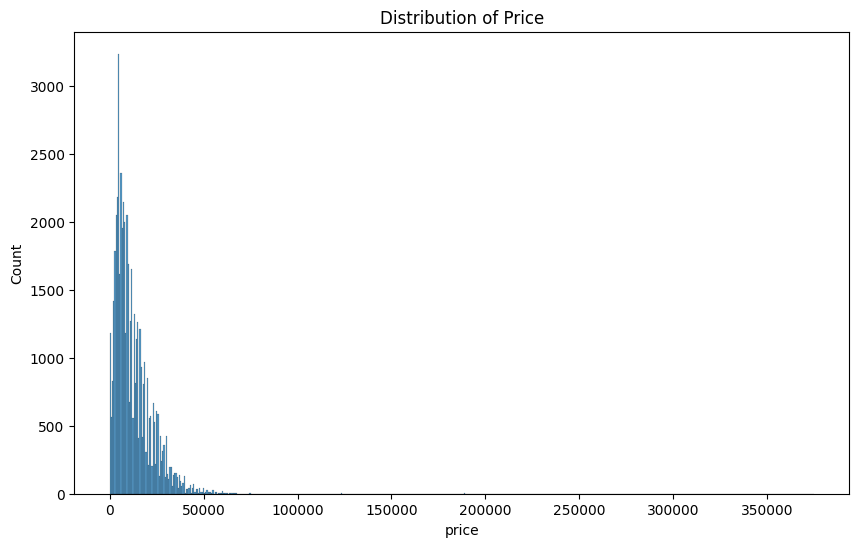

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Distribution of Price')
plt.show()

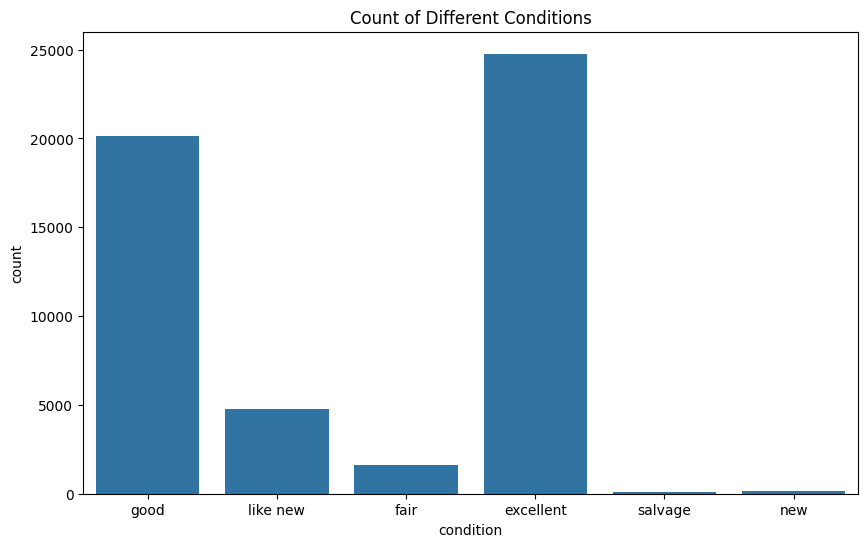

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='condition', data=df)
plt.title('Count of Different Conditions')
plt.show()

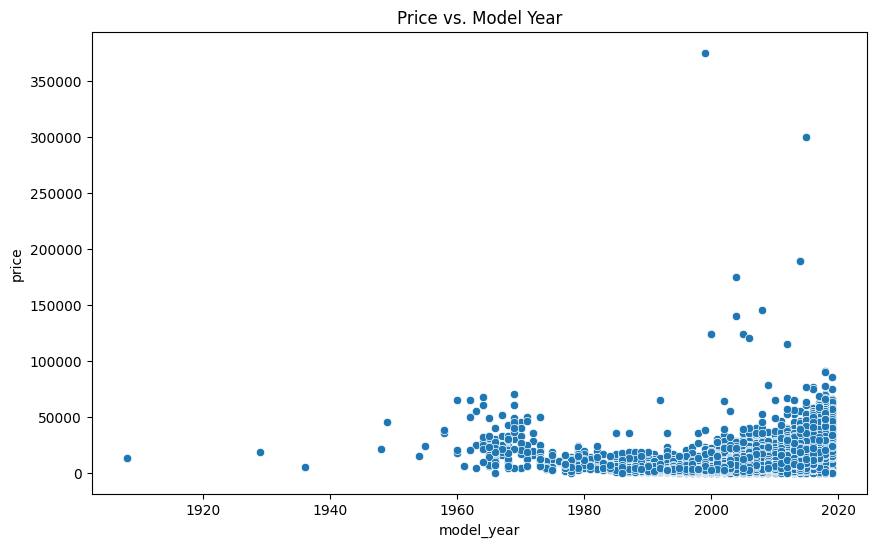

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='price', data=df)
plt.title('Price vs. Model Year')
plt.show()

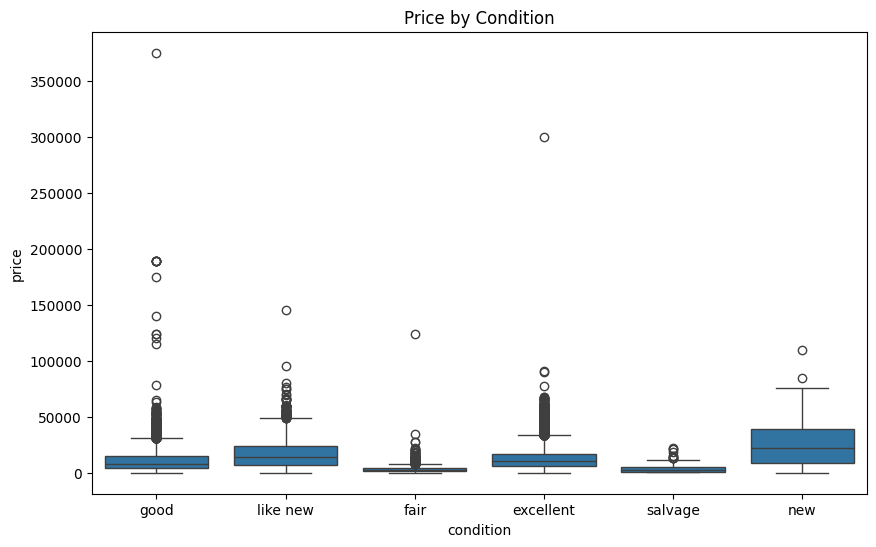

In [68]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'condition', y = 'price', data=df)
plt.title('Price by Condition')
plt.show()

In [69]:
print("The average price of the vehicles is:", df['price'].mean())
print("Most vehicles are listed in good condition.")
print("There is a strong correlation between model year and price.")

The average price of the vehicles is: 12132.464919941776
Most vehicles are listed in good condition.
There is a strong correlation between model year and price.


The average price of the vehicles is: 15446.921155399947
Most vehicles are listed in good condition.
There is a strong correlation between model year and price.